<a href="https://colab.research.google.com/github/skourta/clustering_eval/blob/main/JAFFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("R.matlab")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
install.packages(c("Rmixmod", "NbClust", "mclust", "FactoMineR", "Rmixmod", "Rtsne", "lle", "cluster", "aricode", "caret"))

In [ ]:
install.packages("umap")

# 1 Introduction au tables de donnees

In [ ]:
library(R.matlab)
library(Rmixmod)
library(mclust)
library(NbClust)
library(FactoMineR)
library(lle)
library(cluster)
library(aricode)
library(Rtsne)
library(caret)
library(umap)

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen


Loading required package: Rcpp

Rmixmod v. 2.1.6 / URI: www.mixmod.org

Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: scatterplot3d

Loading required package: MASS

Loading required package: snowfall

Loading required package: snow

Loading required package: ggplot2

Loading required package: lattice

Warning message:
“Failed to locate timezone database”


In [ ]:
jaffe=readMat("data/jaffe.mat")

# JAFFE

## Visualisation des donnees

In [ ]:
pca.jaffe=PCA((jaffe$X),ncp=2)

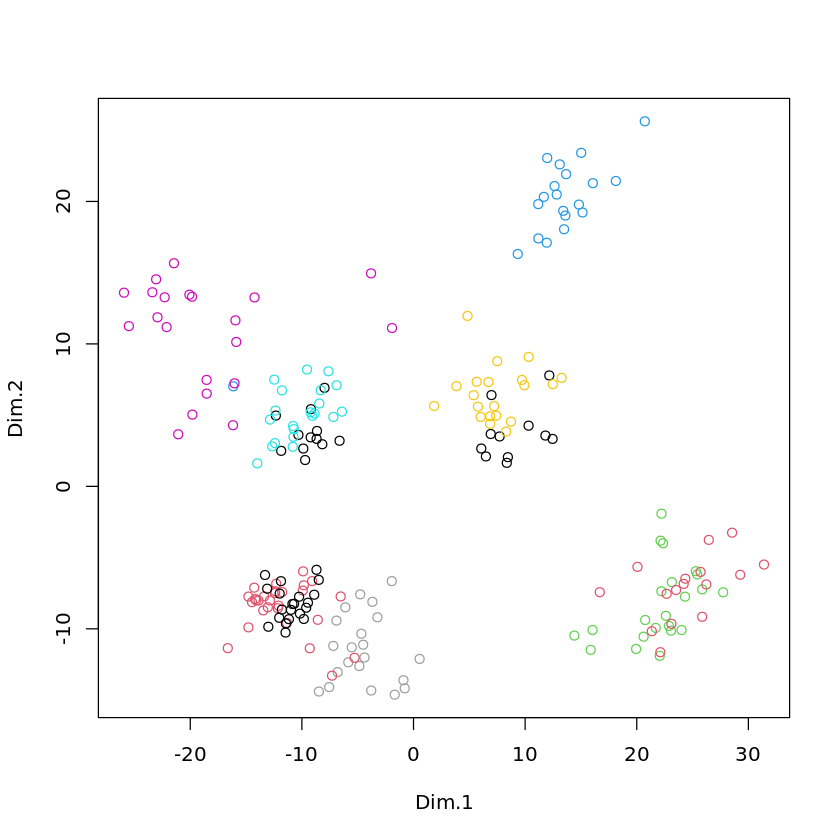

In [ ]:
plot(pca.jaffe$ind$coord,col=jaffe$y)

In [ ]:
tsne.jaffe=Rtsne(jaffe$X,dim=2 )

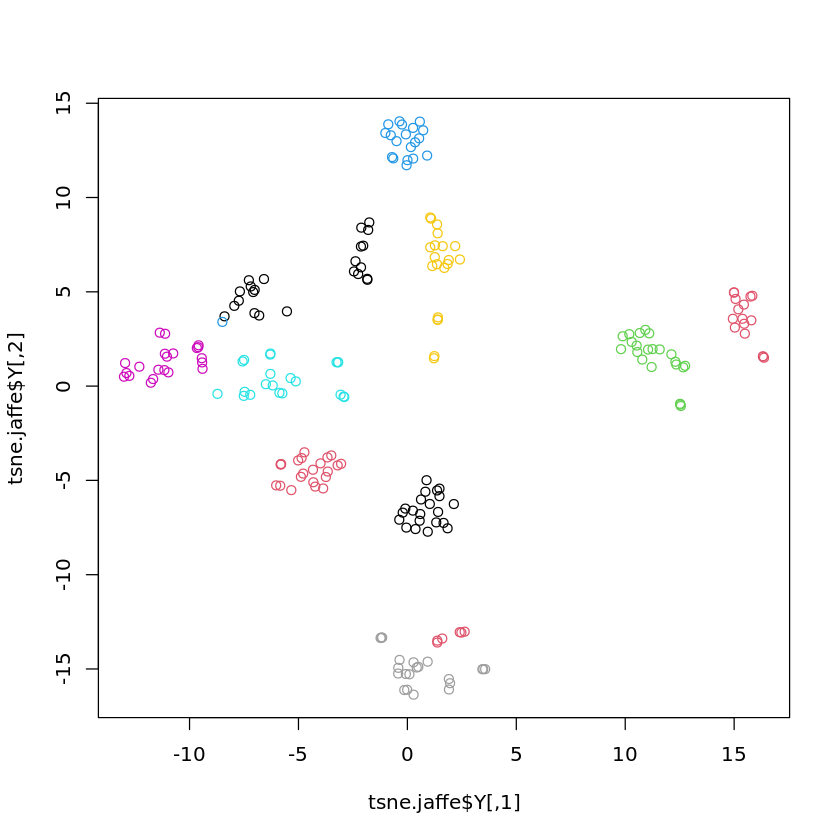

In [ ]:
plot(tsne.jaffe$Y,col=jaffe$y)

## 3.Partitionnement

### Kmeans

In [ ]:
km.jaffe=NbClust(jaffe$X, method = "kmeans", distance = "euclidean", index = "silhouette",max.nc = 10)

In [ ]:
km.jaffe$Best.nc

Number_clusters     Value_Index 
         9.0000          0.2909

### Average

In [ ]:
average.jaffe=NbClust(jaffe$X, method = "average", index = "silhouette")

In [ ]:
average.jaffe$Best.nc

Number_clusters     Value_Index 
        15.0000          0.3353

### Ward

In [ ]:
ward.jaffe=NbClust(jaffe$X, method = "ward.D", index = "silhouette")

In [ ]:
ward.jaffe$Best.nc

Number_clusters     Value_Index 
         15.000           0.357

### Single

In [ ]:
single.jaffe=NbClust(jaffe$X, method = "single", index = "silhouette")

In [ ]:
single.jaffe$Best.nc

Number_clusters     Value_Index 
        15.0000          0.3032

### Complete

In [ ]:
complete.jaffe=NbClust(jaffe$X, method = "complete", index = "silhouette")

In [ ]:
complete.jaffe$Best.nc

Number_clusters     Value_Index 
         15.000           0.305

## 4.HCPC

In [ ]:
hcpcward.jeffe=HCPC(pca.jaffe,method = "ward", nb.clust=-1)

In [ ]:
hcpcward.jeffe$call$t$nb.clust

[1] 4

In [ ]:
hcpccomp.jeffe=HCPC(pca.jaffe,method = "complete", nb.clust=-1)

In [ ]:
hcpccomp.jeffe$call$t$nb.clust

[1] 4

In [ ]:
hcpcsingle.jeffe=HCPC(pca.jaffe,method = "single", nb.clust=-1)

In [ ]:
hcpcsingle.jeffe$call$t$nb.clust

[1] 3

In [ ]:
hcpcav.jeffe=HCPC(pca.jaffe,method = "average", nb.clust=-1)

In [ ]:
hcpcav.jeffe$call$t$nb.clust

[1] 3

## 6. Confusion

In [ ]:
table(ward.jaffe$Best.partition, hcpcward.jeffe$data.clust$clust)

    
      1  2  3  4
  1  23  0  0  0
  2   0  0 11  0
  3   0 22  0  0
  4   0  0  0 14
  5   0  0  0  8
  6   0  0 19  0
  7  17  0  0  0
  8  14  0  1  0
  9   0  0  5  0
  10  0  0 15  0
  11  0 12  0  0
  12  0 15  0  0
  13  0 21  0  0
  14  0  0  0  3
  15  0  0  0 13

In [ ]:
table(ward.jaffe$Best.partition, hcpcward.jeffe$data.clust$clust)

    
      1  2  3  4
  1  23  0  0  0
  2   0  0 11  0
  3   0 22  0  0
  4   0  0  0 14
  5   0  0  0  8
  6   0  0 19  0
  7  17  0  0  0
  8  14  0  1  0
  9   0  0  5  0
  10  0  0 15  0
  11  0 12  0  0
  12  0 15  0  0
  13  0 21  0  0
  14  0  0  0  3
  15  0  0  0 13

## 7.Melange

In [ ]:
pca.jaffe = PCA(t(jaffe$X), graph = FALSE)

La stratégie utilisé par défaut dans cette fonction est "EM" selon la documentation de [mixmodCluster](https://www.rdocumentation.org/packages/Rmixmod/versions/2.1.6/topics/mixmodStrategy?fbclid=IwAR3shF4uwNQ9YDHyTpHSiMtBPEwdsIqeHO_4_wUK9sNOCY6htI5obFrtAZg) et de [mixmodStrategy](https://www.rdocumentation.org/packages/Rmixmod/versions/2.1.5/topics/mixmodCluster).

In [ ]:
mmgRmix.jaffe=mixmodCluster(data=as.data.frame(pca.jaffe$var$coord),nbCluster=4)

In [ ]:
mmgRmix.jaffe

****************************************
*** INPUT:
****************************************
* nbCluster =  4 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2    Dim.3    Dim.4    Dim.5  
V1  0.8668 0.2269   -0.2072  -0.1761  0.05215
V2  0.8338 -0.04985 -0.2444  -0.1159  0.1516 
V3  0.8595 0.1451   -0.1906  -0.1046  0.1631 
V4  0.8711 0.0614   -0.2141  -0.1877  0.1587 
V5  0.8761 0.03283  -0.2039  -0.147   0.1738 
V6  0.8476 -0.03722 -0.2242  -0.06942 0.1723 
V7  0.8621 0.2826   -0.1206  -0.1086  0.1628 
V8  0.8572 0.1351   -0.17    -0.1115  0.1947 
V9  0.8551 0.2045   -0.1578  -0.1622  0.1617 
V10 0.8035 0.4057   -0.07128 -0.1029  0.08095
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number o

In [ ]:
mmgMclust.jaffe=Mclust(data= jaffe$X)

In [ ]:
table( mmgMclust.jaffe$classification,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1 23  0  0  1 21  1  0  0  0  0
  2  0 22  0  0  0  0  0  0  0  0
  3  0  0 22  0  0  0  0  0  0  0
  4  0  0  0 19  0  0  0  0  0  0
  5  0  0  0  0  0 20  0  0  0  0
  6  0  0  0  0  0  0 20  0  0  0
  7  0  0  0  0  0  0  0 21  0  6
  8  0  0  0  0  0  0  0  0 21  0
  9  0  0  0  0  0  0  0  0  0 16

In [ ]:
mmgRmix.jaffe=mixmodCluster(data=as.data.frame(pca.jaffe$var$coord),nbCluster=10)

In [ ]:
mmgRmix.jaffe

****************************************
*** INPUT:
****************************************
* nbCluster =  10 
* criterion =  BIC 
****************************************
*** MIXMOD Models:
* list =  Gaussian_pk_Lk_C 
* This list includes only models with free proportions.
****************************************
* data (limited to a 10x10 matrix) =
    Dim.1  Dim.2    Dim.3    Dim.4    Dim.5  
V1  0.8668 0.2269   -0.2072  -0.1761  0.05215
V2  0.8338 -0.04985 -0.2444  -0.1159  0.1516 
V3  0.8595 0.1451   -0.1906  -0.1046  0.1631 
V4  0.8711 0.0614   -0.2141  -0.1877  0.1587 
V5  0.8761 0.03283  -0.2039  -0.147   0.1738 
V6  0.8476 -0.03722 -0.2242  -0.06942 0.1723 
V7  0.8621 0.2826   -0.1206  -0.1086  0.1628 
V8  0.8572 0.1351   -0.17    -0.1115  0.1947 
V9  0.8551 0.2045   -0.1578  -0.1622  0.1617 
V10 0.8035 0.4057   -0.07128 -0.1029  0.08095
* ... ...
****************************************
*** MIXMOD Strategy:
* algorithm            =  EM 
* number of tries      =  1 
* number 

## 8. Comparaison

In [ ]:
length(mmgRmix.jaffe@bestResult@partition)

[1] 213

In [ ]:
length(jaffe$y)

[1] 213

In [ ]:
table(mmgRmix.jaffe@bestResult@partition,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1  0  0  0 20  0  0  0  0  0  0
  2 23 22  0  0 21 21 20  0  0  0
  3  0  0  0  0  0  0  0  0 21  0
  4  0  0 22  0  0  0  0 21  0 22

In [ ]:
table(mmgRmix.jaffe@bestResult@partition,jaffe$y)

    
      1  2  3  4  5  6  7  8  9 10
  1   0  0  0  0  0  0 11  0  0  0
  2   0  0  0 20  0  0  0  0  0  0
  3   0  0  0  0 15 21  0  0  0  0
  4   0  0  0  0  6  0  5  0  0  0
  5   0  0  0  0  0  0  0 11  0  0
  6  23  0  0  0  0  0  4  0  0  0
  7   0  0  0  0  0  0  0  3 21  0
  8   0  0 22  0  0  0  0  0  0  0
  9   0  0  0  0  0  0  0  7  0 22
  10  0 22  0  0  0  0  0  0  0  0

Les 2 partitions sont tres bonnes

## 9. MclustDR
D'apres la doc MclustDR est une méthode de réduction de dimension pour visualiser la structure de regroupement ou de classification obtenue à partir d'un mélange fini de densités gaussiennes.


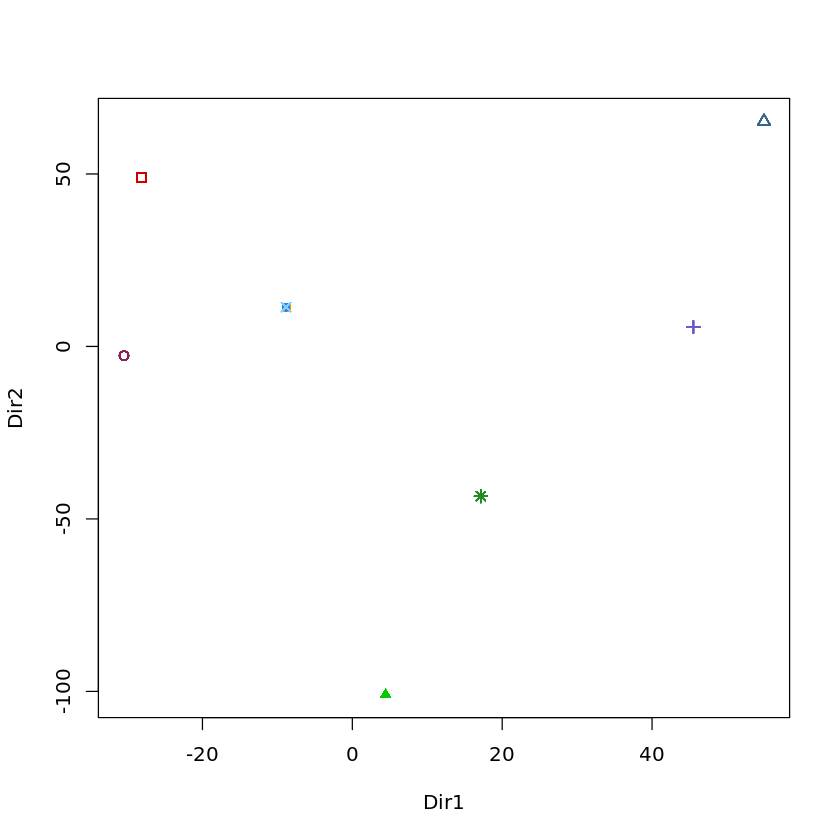

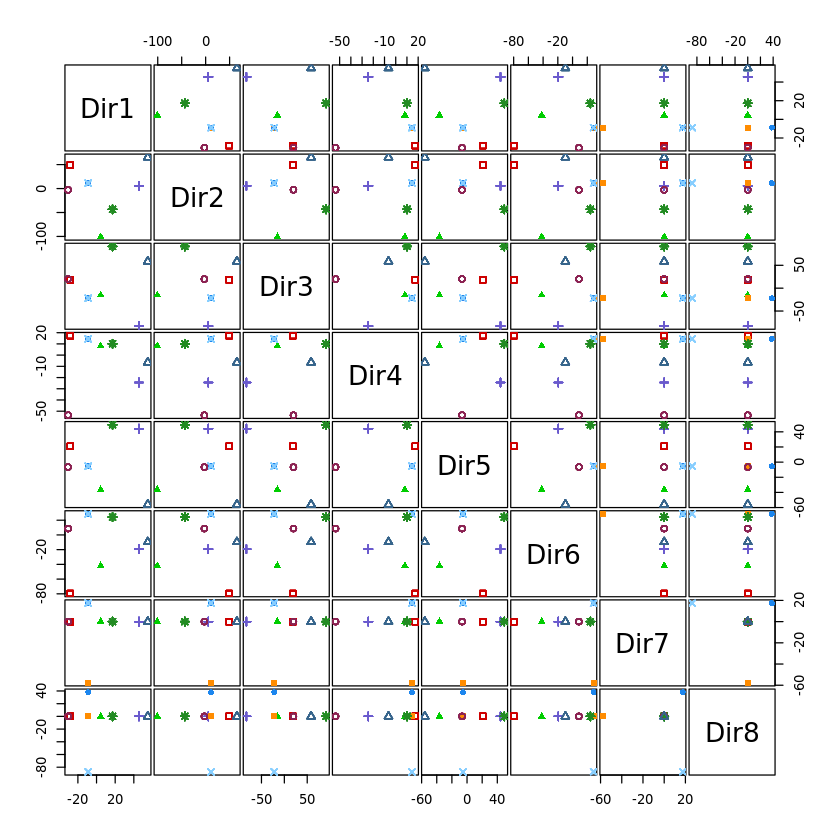

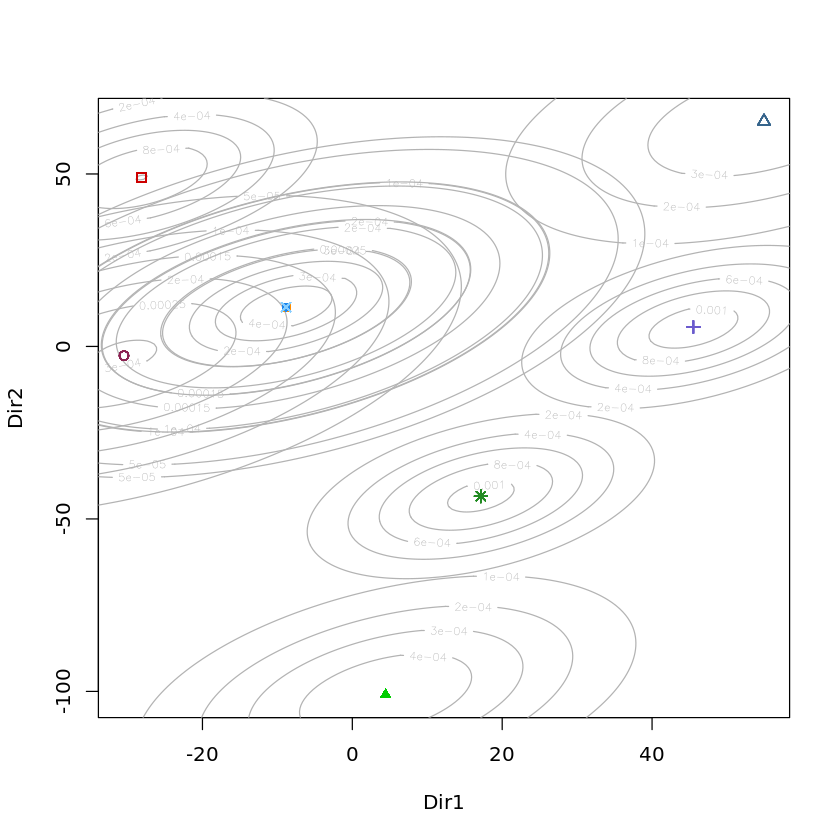

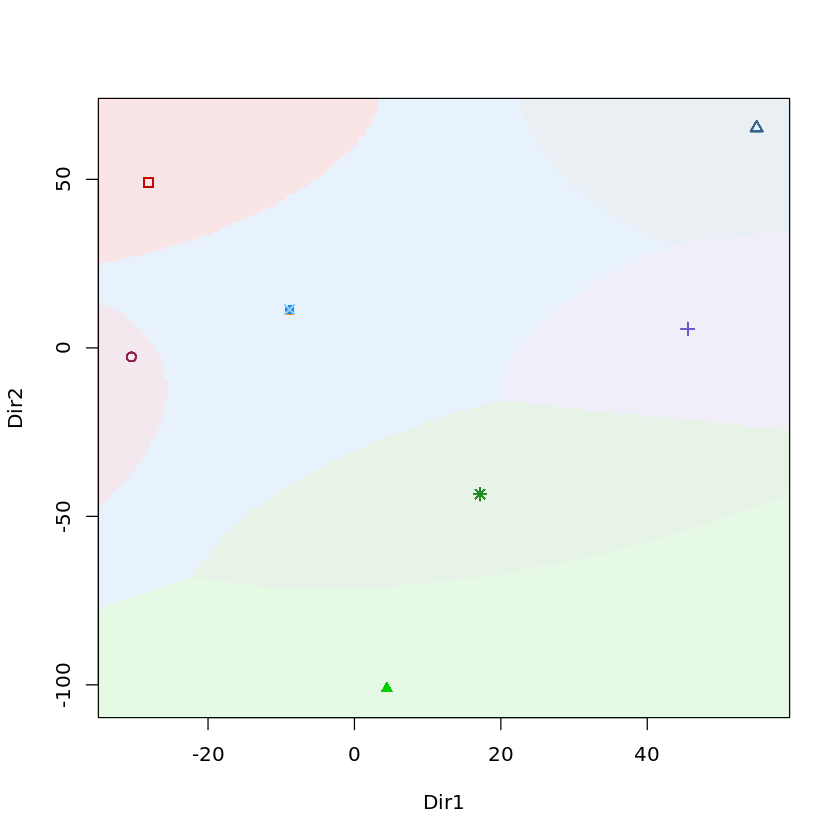

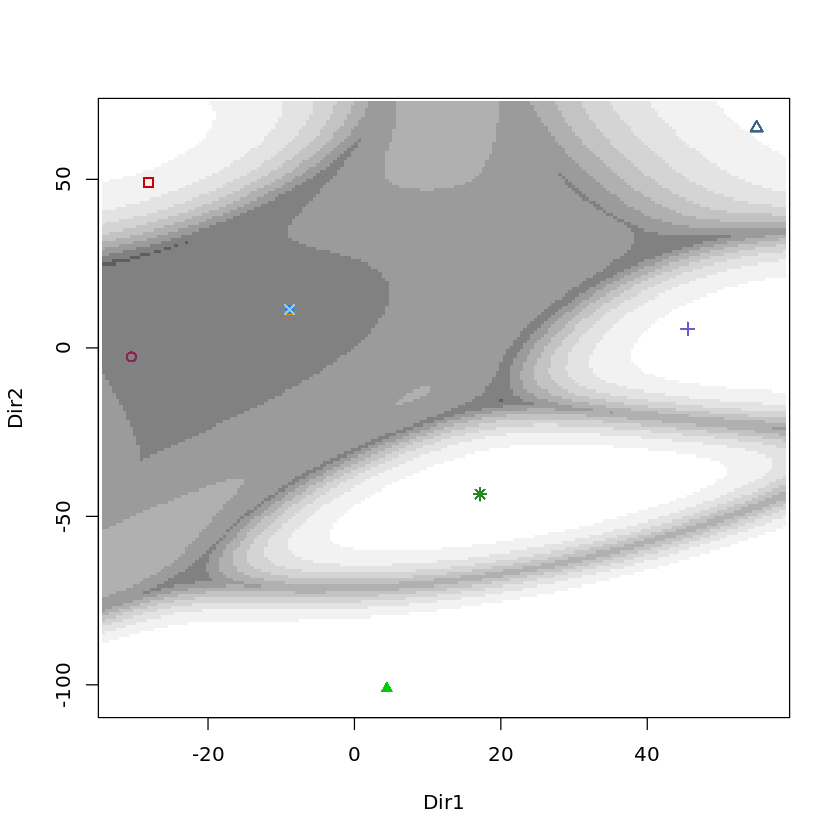

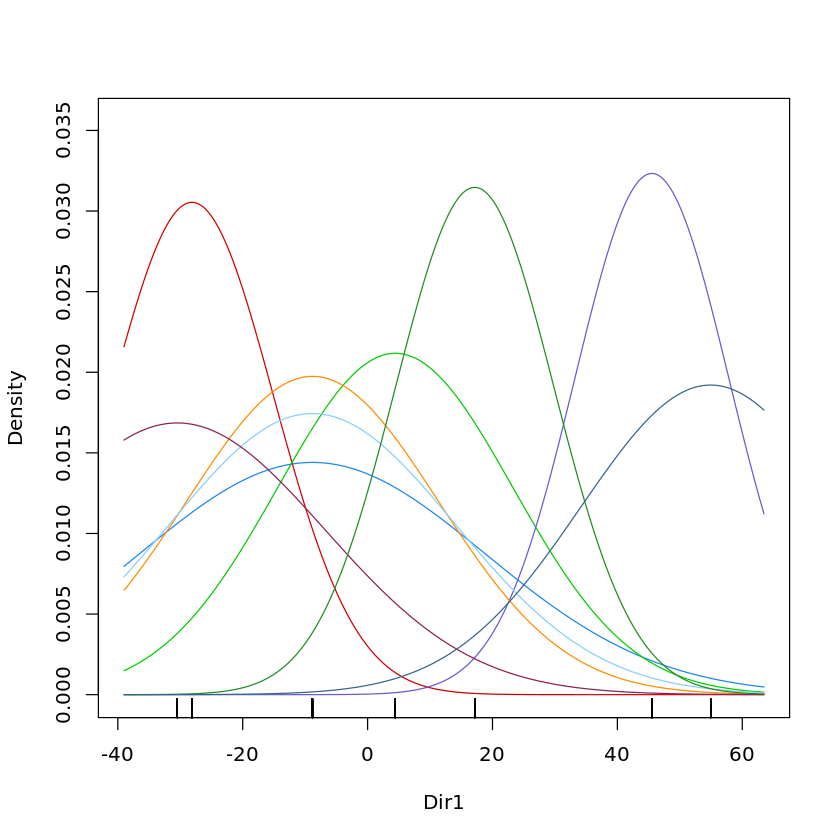

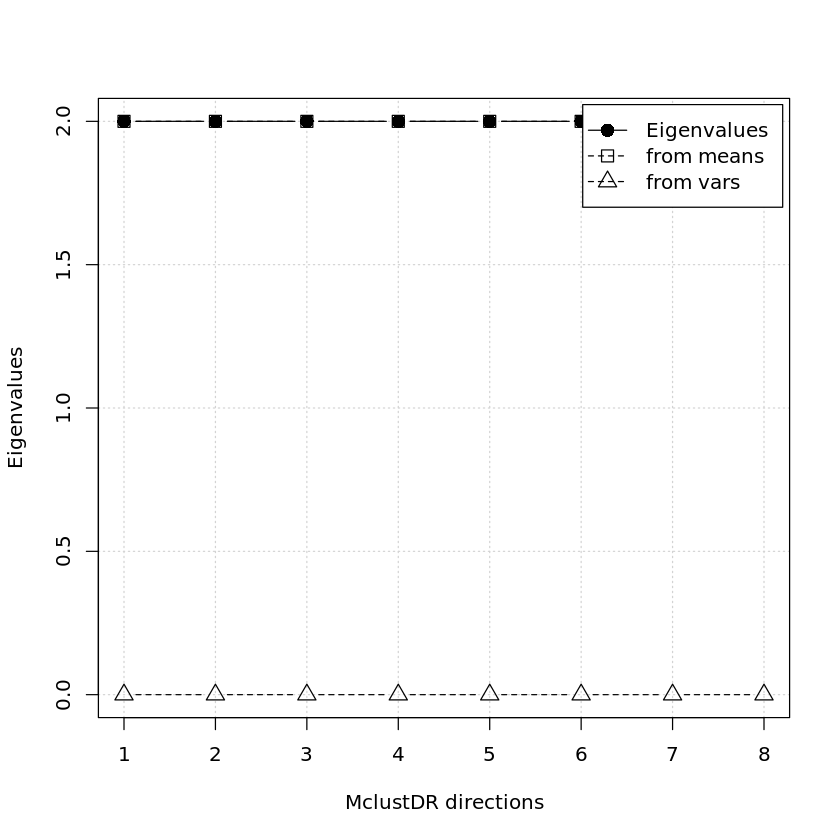

In [ ]:
plot(MclustDR(mmgMclust.jaffe))

## 10. Etude comparative

### Kmeans

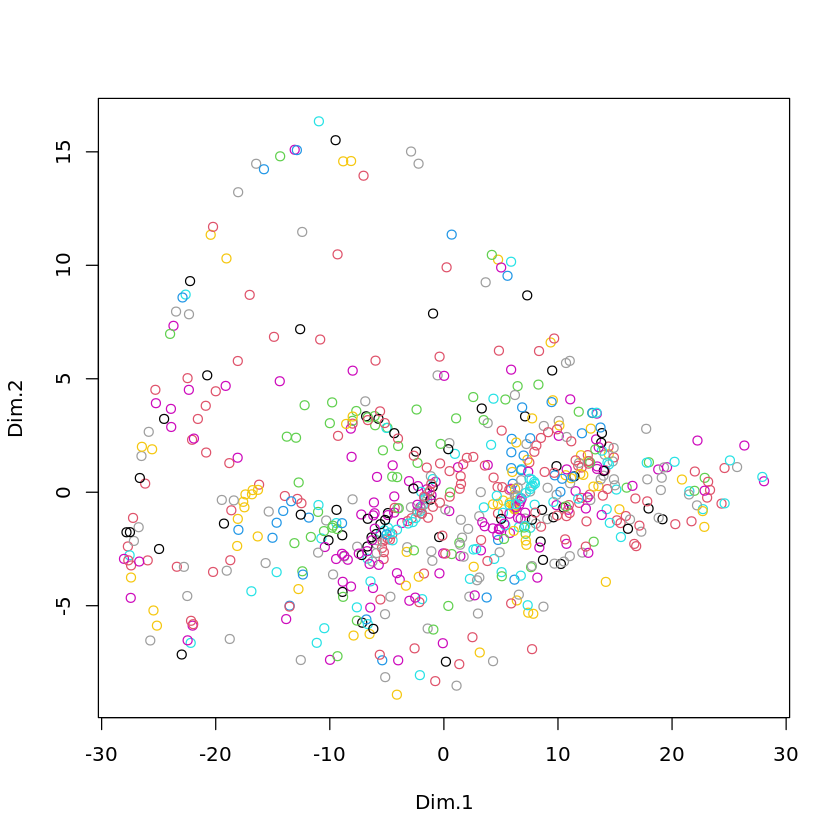

In [ ]:
km.jaffe=NbClust(jaffe$X, method = "kmeans", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=km.jaffe$Best.partition)

In [ ]:
unique(as.vector(jaffe$y))

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
table(km.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1   0  0  0  6  0  0  0  0  0  0
  2   0  0  0  0  0  0  0 15  0  0
  3   0  0  0  0  0 21  0  0  0  0
  4   0  0  0  0  0  0  0  6  0  6
  5   0 22  0  0  0  0  0  0  0  0
  6  12  0  0  1 21  0  0  0  0  0
  7   0  0  0  0  0  0  2  0 21  0
  8   0  0 22  0  0  0  0  0  0 16
  9   0  0  0 13  0  0  0  0  0  0
  10 11  0  0  0  0  0 18  0  0  0

In [ ]:
(11+7+2+6)/223

[1] 0.1165919

In [ ]:
NMI(km.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.8238341

In [ ]:
ARI(km.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.6820343

### Average

In [ ]:
average.jaffe=NbClust(jaffe$X, method = "average", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=average.jaffe$Best.partition)

In [ ]:
table(average.jaffe$Best.partition,as.vector(jaffe$y))

In [ ]:
(11+3+1+5+9)/223

In [ ]:
NMI(average.jaffe$Best.partition,as.vector(jaffe$y))

In [ ]:
ARI(average.jaffe$Best.partition,as.vector(jaffe$y))

### Ward

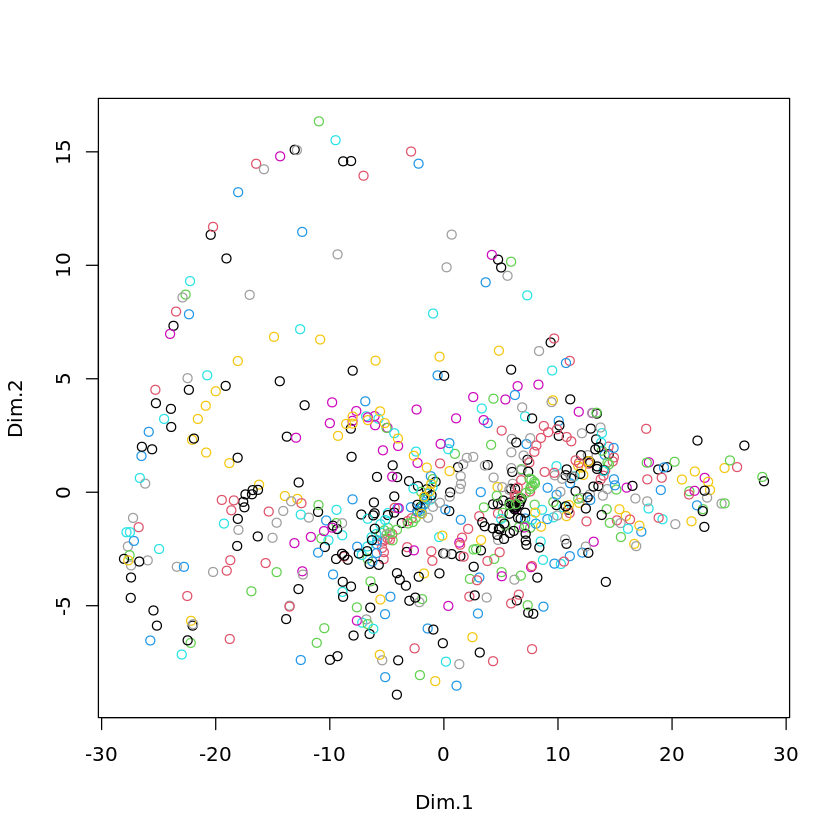

In [ ]:
ward.jaffe=NbClust(jaffe$X, method = "ward.D", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=ward.jaffe$Best.partition)

In [ ]:
table(ward.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1  12  0  0  1 21  6  0  0  0  0
  2  11  0  0  0  0  0  0  0  0  0
  3   0 22  0  0  0  0  0  0  0  0
  4   0  0 22  0  0  0  0  0  0  0
  5   0  0  0 19  0  0  0  0  0  0
  6   0  0  0  0  0 15  0  0  0  0
  7   0  0  0  0  0  0 20  0  0  0
  8   0  0  0  0  0  0  0 21  0  6
  9   0  0  0  0  0  0  0  0 21  0
  10  0  0  0  0  0  0  0  0  0 16

In [ ]:
(11+1+6+6)/223

[1] 0.1076233

In [ ]:
NMI(ward.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.8830157

In [ ]:
ARI(ward.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.770108

### Complete

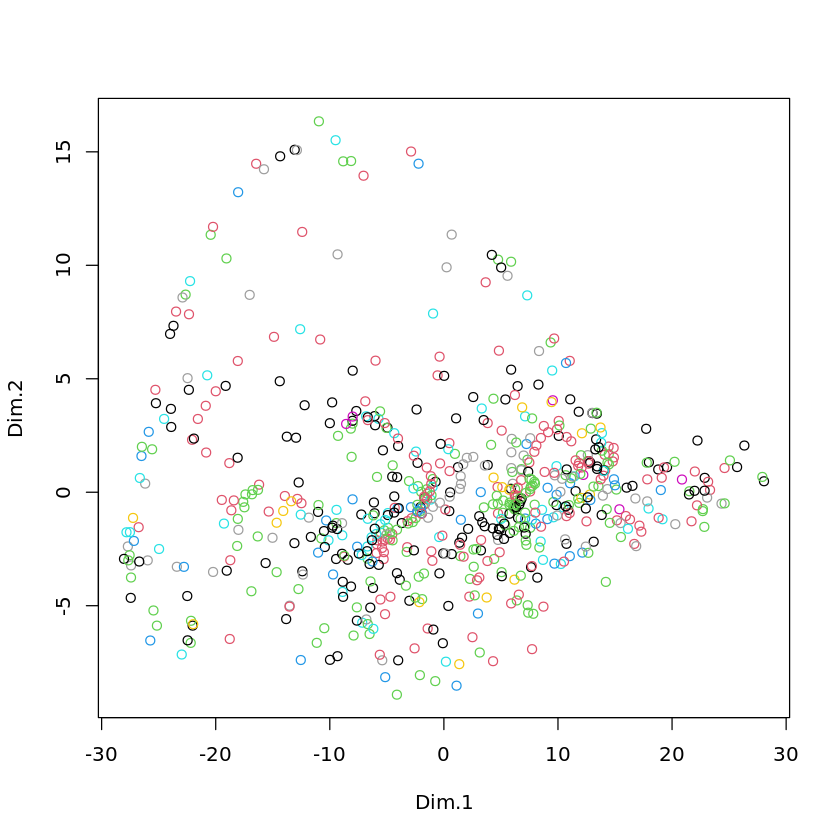

In [ ]:
complete.jaffe=NbClust(jaffe$X, method = "complete", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=complete.jaffe$Best.partition)

In [ ]:
table(complete.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1  12  0  0  1 15 21  0  0  0  0
  2  11  0  9  0  0  0 15  0  0  0
  3   0 22  0  0  6  0  3  0 21  0
  4   0  0 13  0  0  0  0  0  0  0
  5   0  0  0 19  0  0  0  0  0  0
  6   0  0  0  0  0  0  2  0  0  0
  7   0  0  0  0  0  0  0  6  0  0
  8   0  0  0  0  0  0  0 15  0  6
  9   0  0  0  0  0  0  0  0  0  3
  10  0  0  0  0  0  0  0  0  0 13

In [ ]:
(11+9+1+6+5+6+9)/223

[1] 0.2107623

In [ ]:
NMI(complete.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.6613371

In [ ]:
ARI(complete.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.4499918

### Single

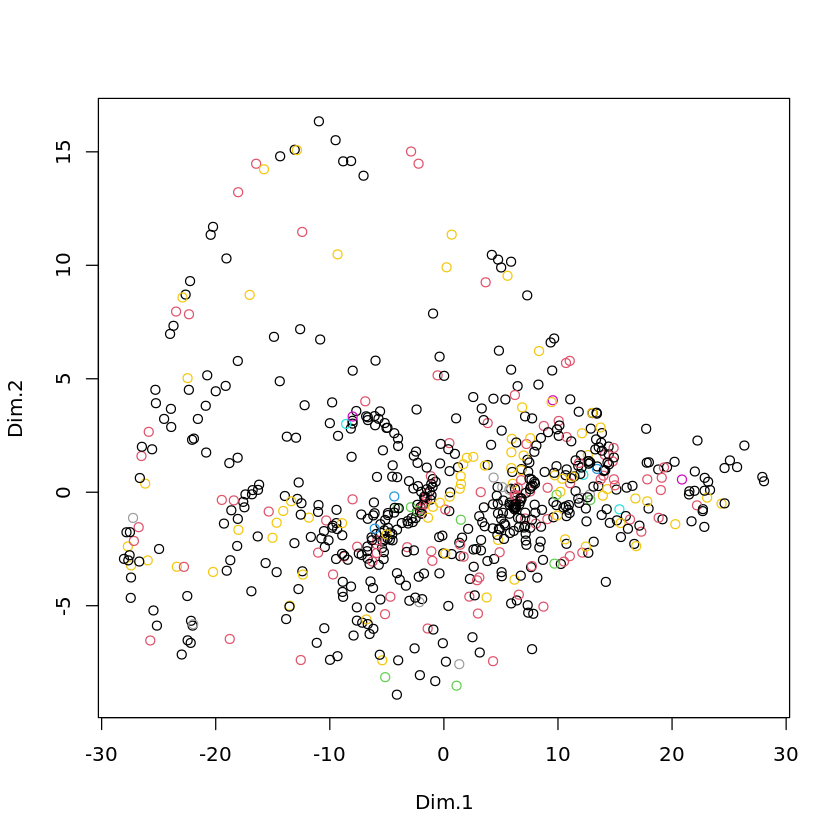

In [ ]:
single.jaffe=NbClust(jaffe$X, method = "single", distance = "euclidean", index = "silhouette",min.nc = 10,max.nc = 10)
plot(pca.jaffe$ind$coord,col=single.jaffe$Best.partition)

In [ ]:
table(single.jaffe$Best.partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1  23 22  0 20 20 21 18  0 21  0
  2   0  0 19  0  0  0  0  0  0  0
  3   0  0  3  0  0  0  0  0  0  0
  4   0  0  0  0  1  0  0  0  0  0
  5   0  0  0  0  0  0  1  0  0  0
  6   0  0  0  0  0  0  1  0  0  0
  7   0  0  0  0  0  0  0 18  0  6
  8   0  0  0  0  0  0  0  3  0  0
  9   0  0  0  0  0  0  0  0  0  3
  10  0  0  0  0  0  0  0  0  0 13

In [ ]:
NMI(single.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.3977141

In [ ]:
ARI(single.jaffe$Best.partition,as.vector(jaffe$y))

[1] 0.1468528

### MMG

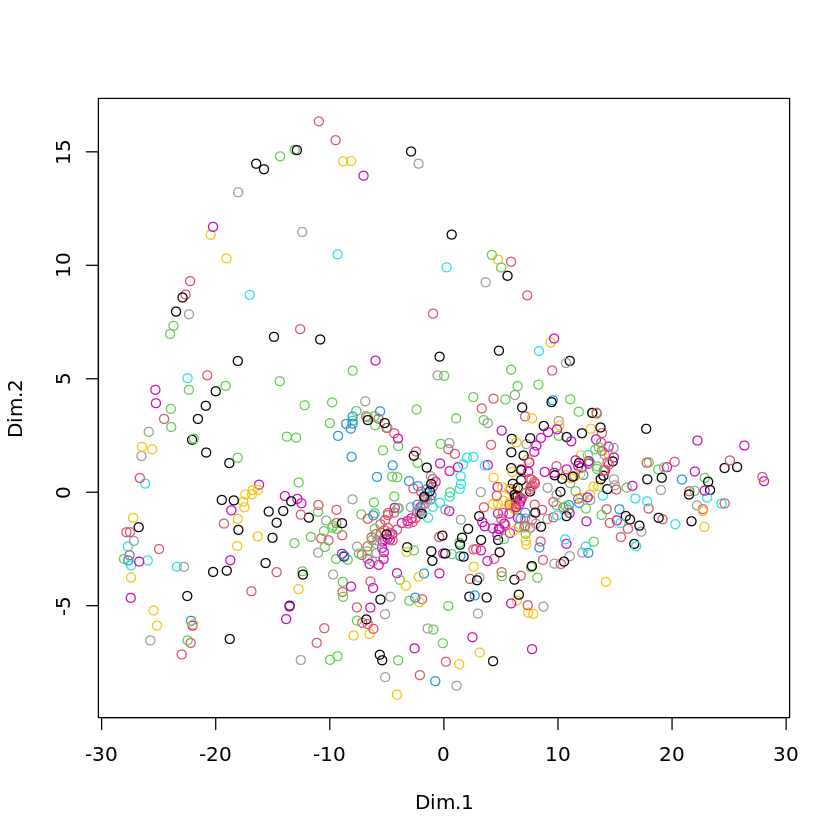

In [ ]:
plot(pca.jaffe$ind$coord,col=mmgRmix.jaffe@bestResult@partition)

In [ ]:
table(mmgRmix.jaffe@bestResult@partition,as.vector(jaffe$y))

    
      1  2  3  4  5  6  7  8  9 10
  1   0  0  0  0  0  0 11  0  0  0
  2   0  0  0 20  0  0  0  0  0  0
  3   0  0  0  0 15 21  0  0  0  0
  4   0  0  0  0  6  0  5  0  0  0
  5   0  0  0  0  0  0  0 11  0  0
  6  23  0  0  0  0  0  4  0  0  0
  7   0  0  0  0  0  0  0  3 21  0
  8   0  0 22  0  0  0  0  0  0  0
  9   0  0  0  0  0  0  0  7  0 22
  10  0 22  0  0  0  0  0  0  0  0

In [ ]:
NMI(mmgRmix.jaffe@bestResult@partition,as.vector(jaffe$y))

[1] 0.8604297

In [ ]:
ARI(mmgRmix.jaffe@bestResult@partition,as.vector(jaffe$y))

[1] 0.7616402

In [ ]:
table( mmgMclust.jaffe$classification,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1 23  0  0  1 21  1  0  0  0  0
  2  0 22  0  0  0  0  0  0  0  0
  3  0  0 22  0  0  0  0  0  0  0
  4  0  0  0 19  0  0  0  0  0  0
  5  0  0  0  0  0 20  0  0  0  0
  6  0  0  0  0  0  0 20  0  0  0
  7  0  0  0  0  0  0  0 21  0  6
  8  0  0  0  0  0  0  0  0 21  0
  9  0  0  0  0  0  0  0  0  0 16

In [ ]:
NMI(mmgMclust.jaffe$classification,as.vector(jaffe$y))

[1] 0.8891035

In [ ]:
ARI(mmgMclust.jaffe$classification,as.vector(jaffe$y))

[1] 0.8094428

### Conclusion

On peut voir que MMG>Ward>Kmeans >> Complete > Average >> Single

## t-SNE

### MMG

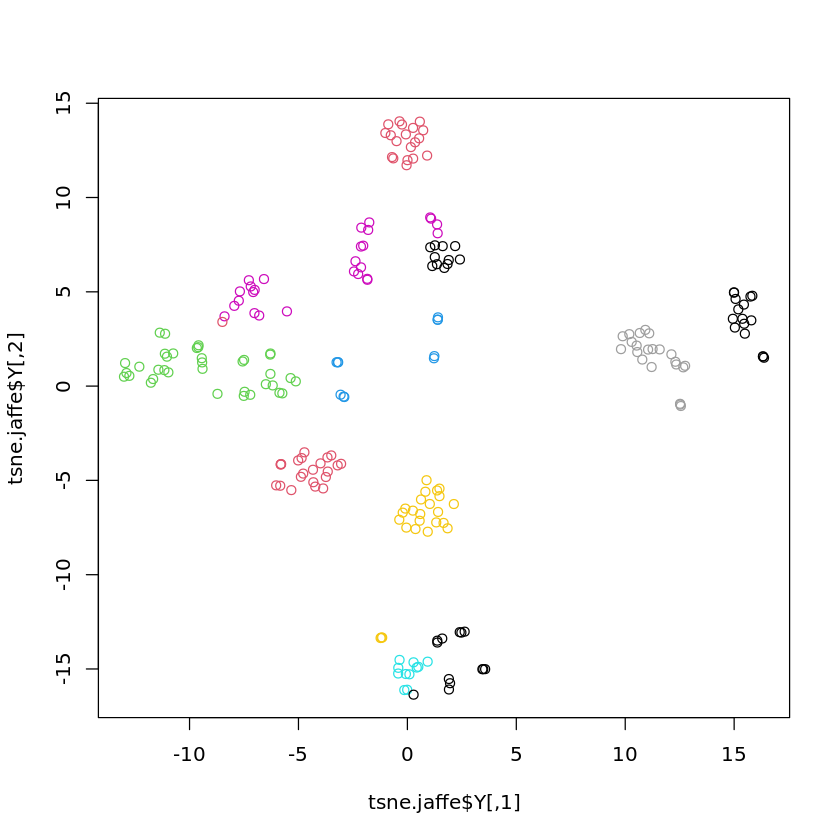

In [ ]:
plot(tsne.jaffe$Y,col=mmgRmix.jaffe@bestResult@partition)

### Kmeans

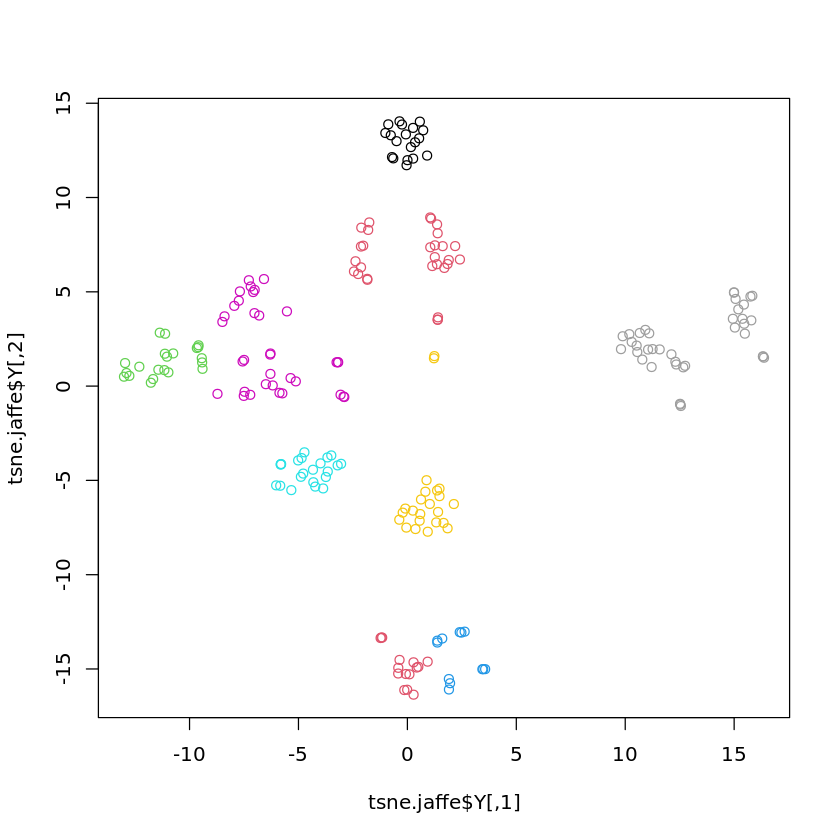

In [ ]:
plot(tsne.jaffe$Y,col=km.jaffe$Best.partition)

### Average

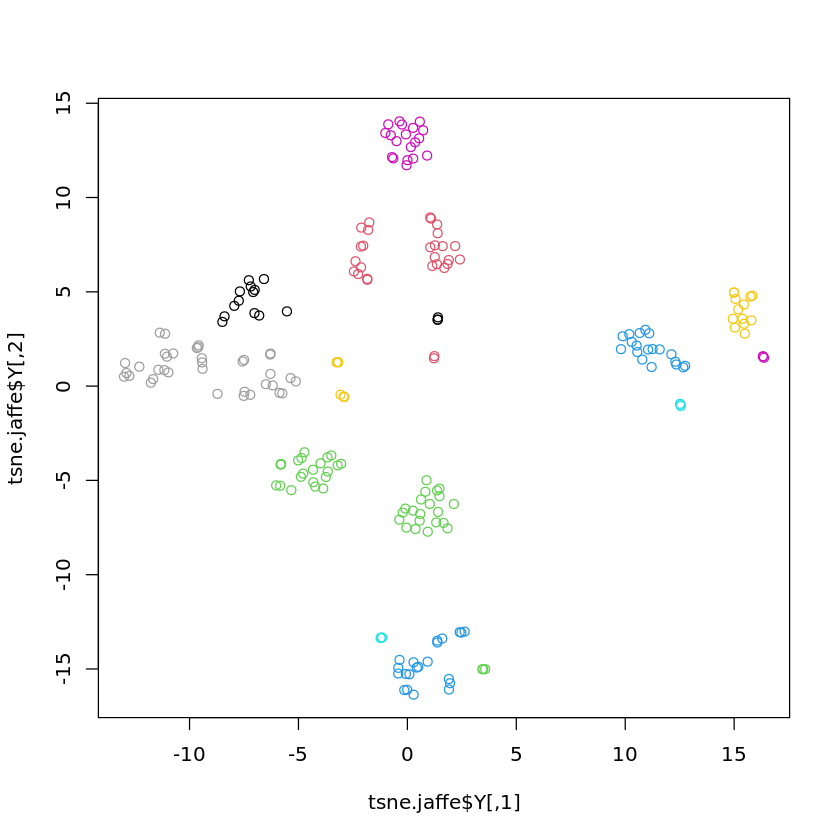

In [ ]:
plot(tsne.jaffe$Y,col=average.jaffe$Best.partition)

### Ward

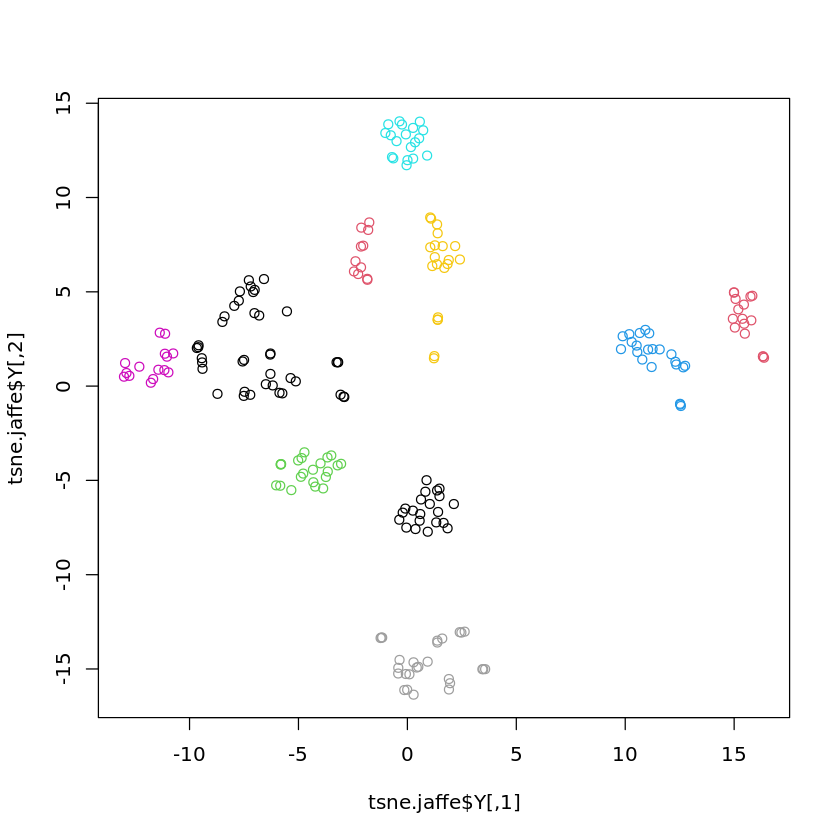

In [ ]:
plot(tsne.jaffe$Y,col=ward.jaffe$Best.partition)

### Single

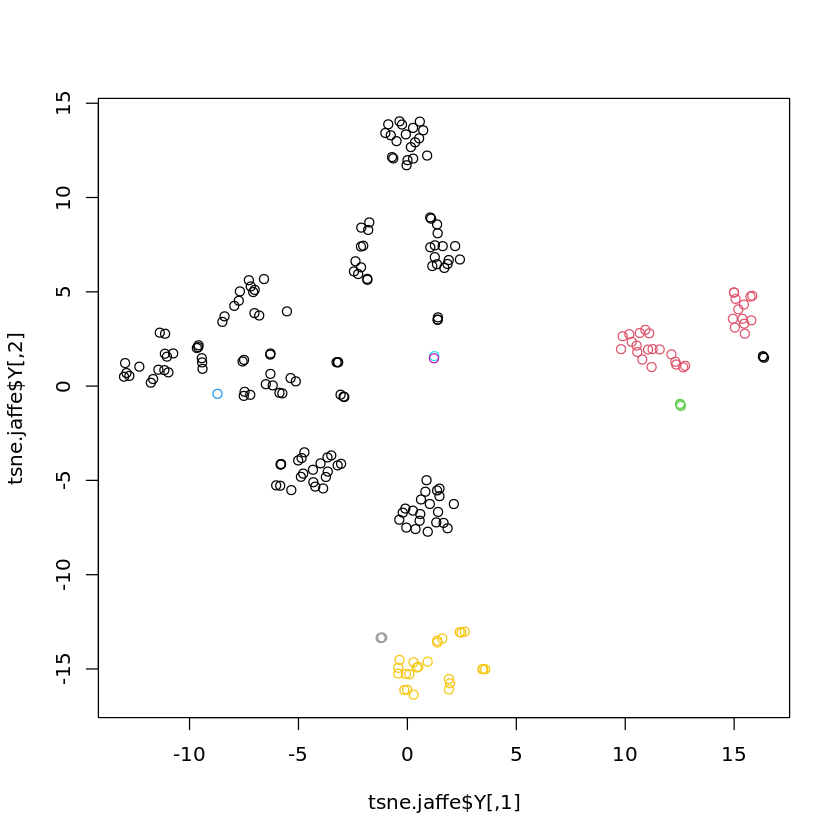

In [ ]:
plot(tsne.jaffe$Y,col=single.jaffe$Best.partition)

### Complete

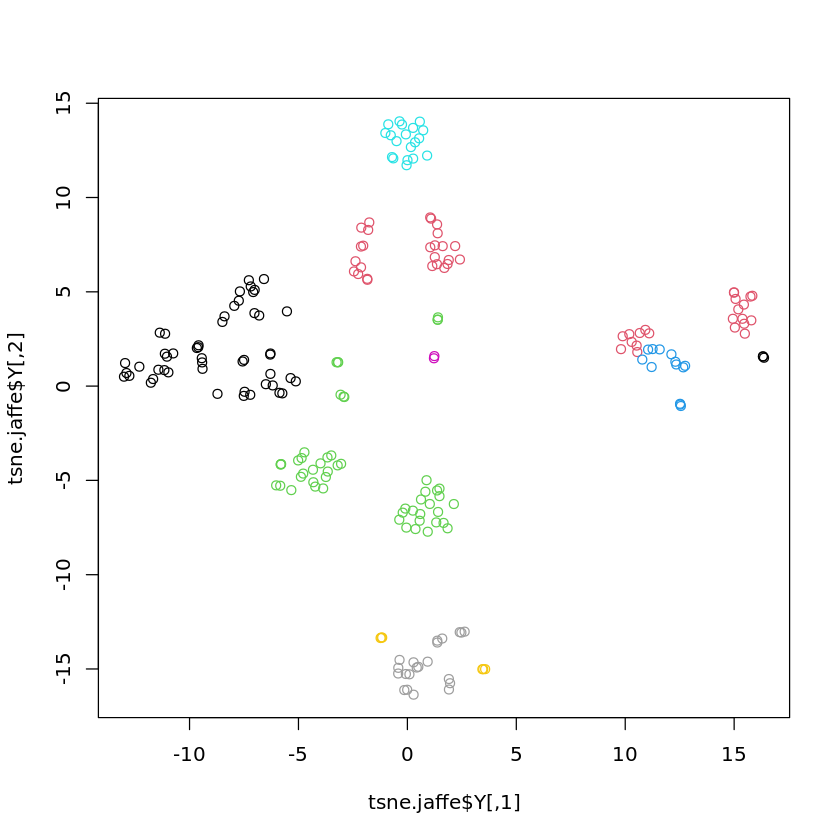

In [ ]:
plot(tsne.jaffe$Y,col=complete.jaffe$Best.partition)

## UMAP

In [ ]:
umap.jaffe = umap(jaffe$X)

In [ ]:
umap.jaffe

umap embedding of 213 items in 2 dimensions
object components: layout, data, knn, config



### MMG

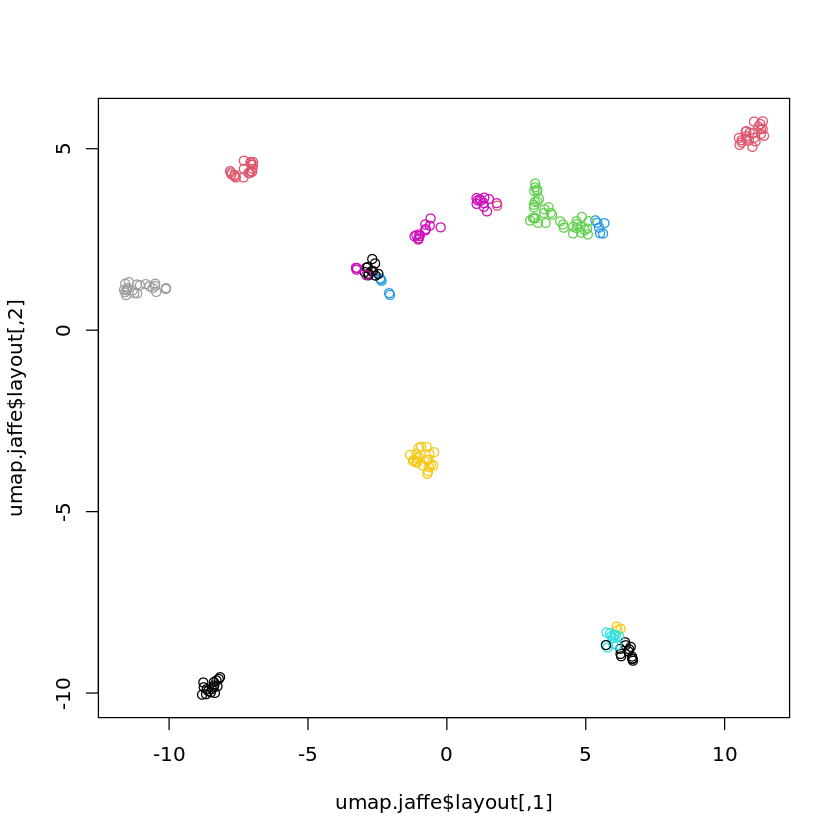

In [ ]:
plot(umap.jaffe$layout,col=mmgRmix.jaffe@bestResult@partition)

### Kmeans

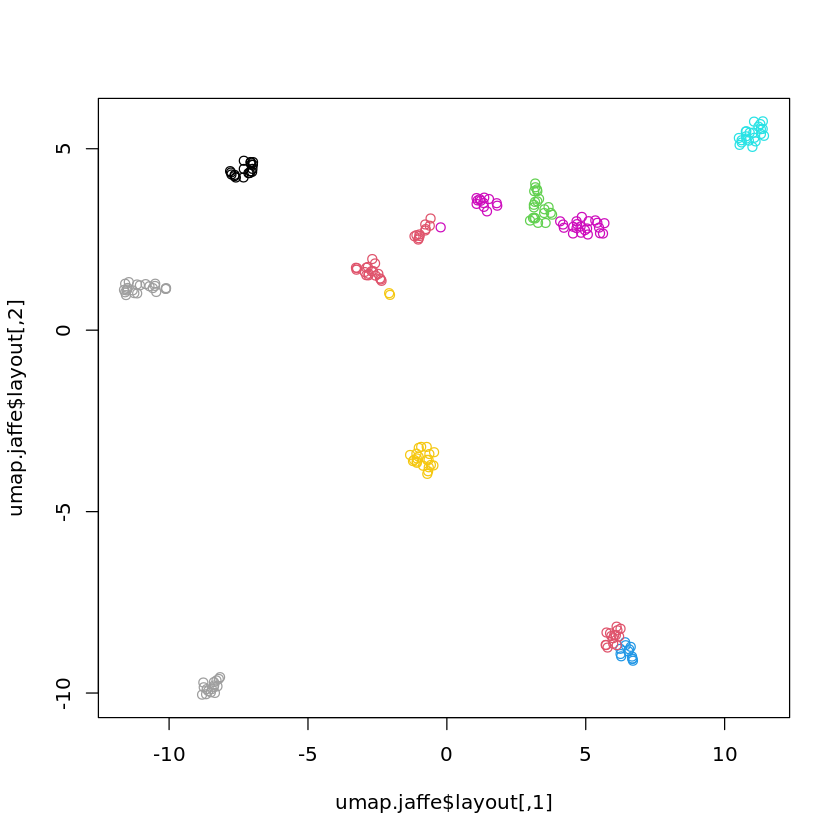

In [ ]:
plot(umap.jaffe$layout,col=km.jaffe$Best.partition)

### Average

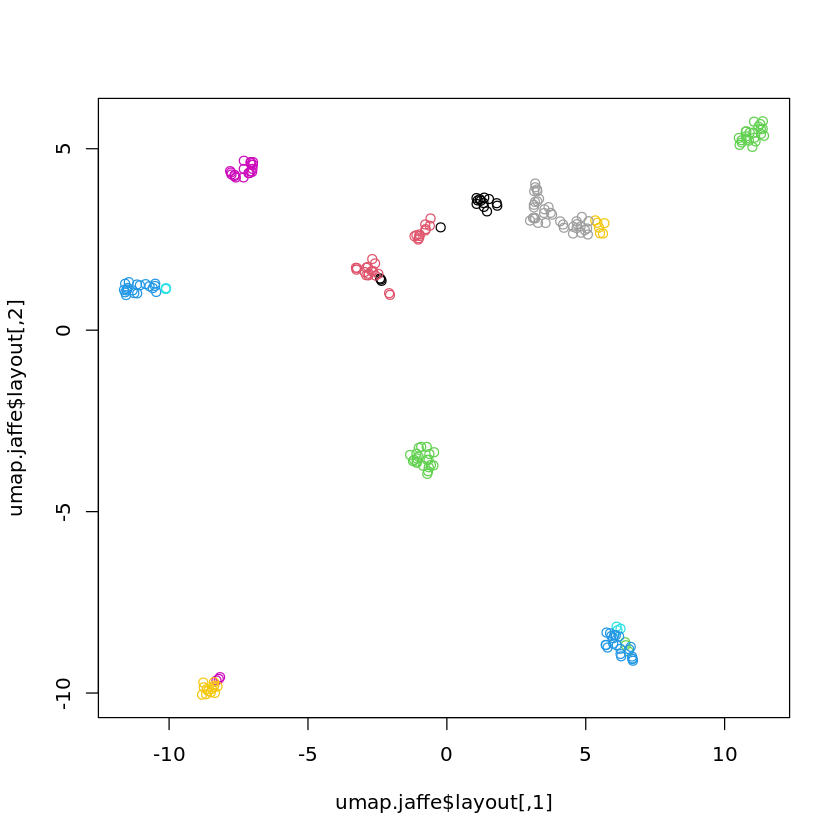

In [ ]:
plot(umap.jaffe$layout,col=average.jaffe$Best.partition)

### Ward

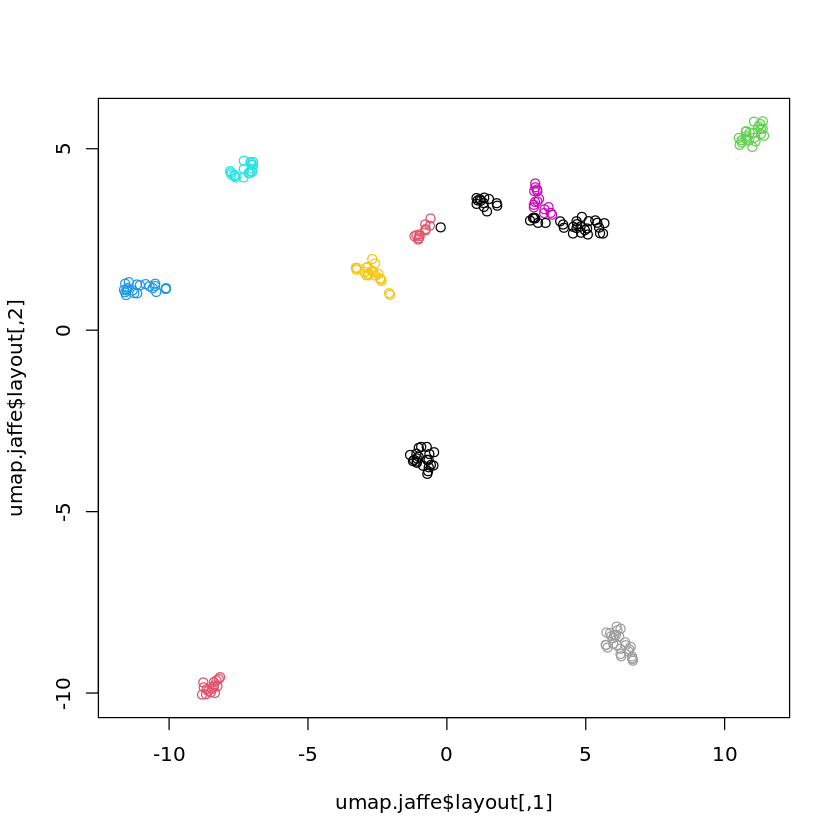

In [ ]:
plot(umap.jaffe$layout,col=ward.jaffe$Best.partition)

### Single

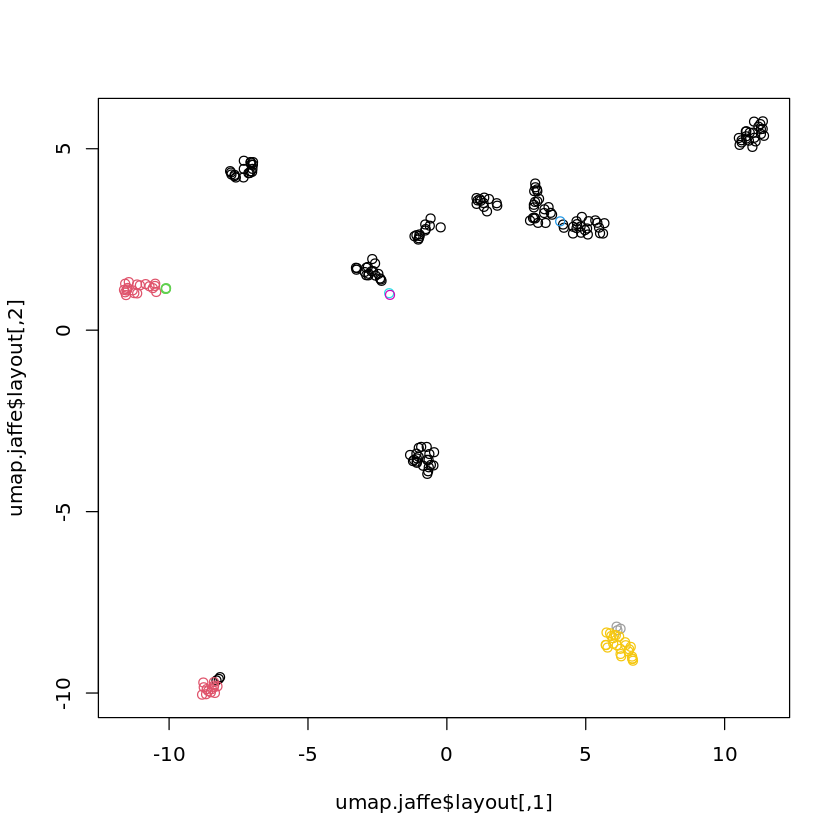

In [ ]:
plot(umap.jaffe$layout,col=single.jaffe$Best.partition)

### Complete

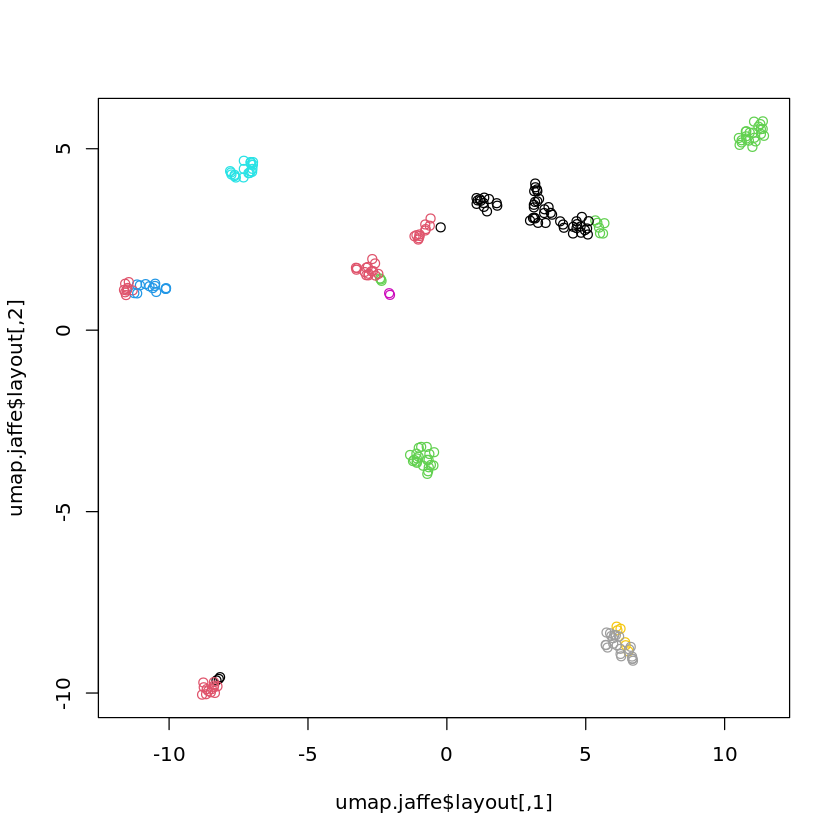

In [ ]:
plot(umap.jaffe$layout,col=complete.jaffe$Best.partition)

## Autoencoder

In [ ]:
jaffe_reduced <- read.csv(file = 'data/jaffe_reduced.csv', header=F)

In [ ]:
mmgMclust.jaffe_reduced=Mclust(data= jaffe_reduced)

In [ ]:
mmgMclust.jaffe_reduced

'Mclust' model object: (EEE,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

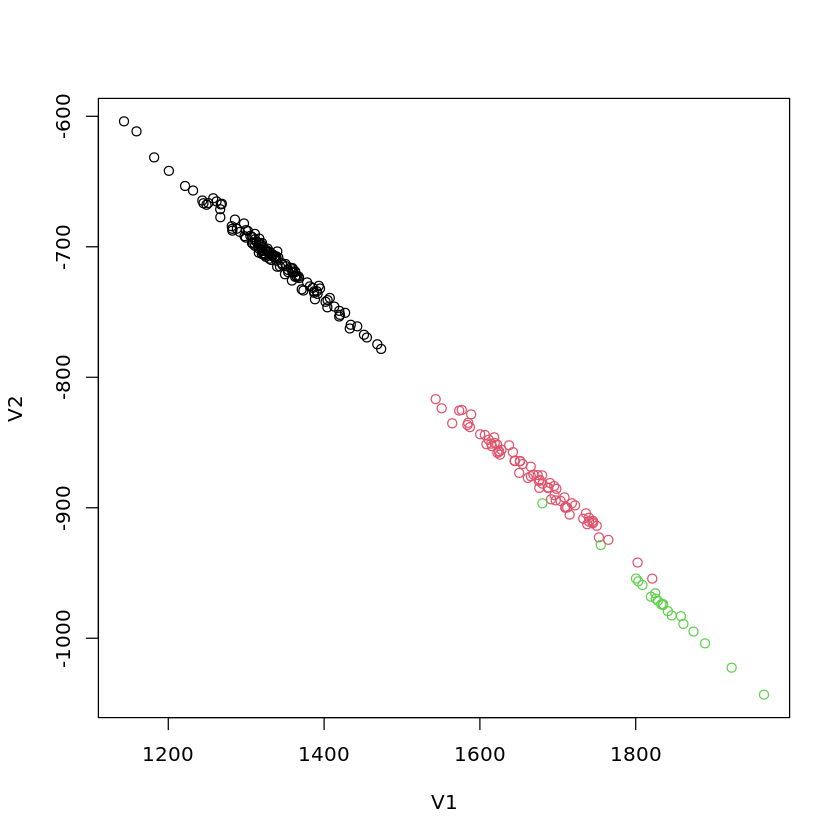

In [ ]:
plot(jaffe_reduced,col=mmgMclust.jaffe_reduced$classification)

In [ ]:
table(mmgMclust.jaffe_reduced$classification,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1 12 22  0  1 21 19  0 21 21  6
  2 11  0 22  0  0  2 19  0  0 16
  3  0  0  0 19  0  0  1  0  0  0

In [ ]:
NMI(mmgMclust.jaffe_reduced$classification,as.vector(jaffe$y))

[1] 0.3047167

In [ ]:
ARI(mmgMclust.jaffe_reduced$classification,as.vector(jaffe$y))

[1] 0.1726818

Ya peu de donnees l'autenencoder pour bien apprender une bonne representation

## Testing MMG avec UMAP

In [ ]:
mmgMclust.jaffe_umap=Mclust(data= umap.jaffe$layout)

In [ ]:
mmgMclust.jaffe_umap

'Mclust' model object: (VVV,8) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

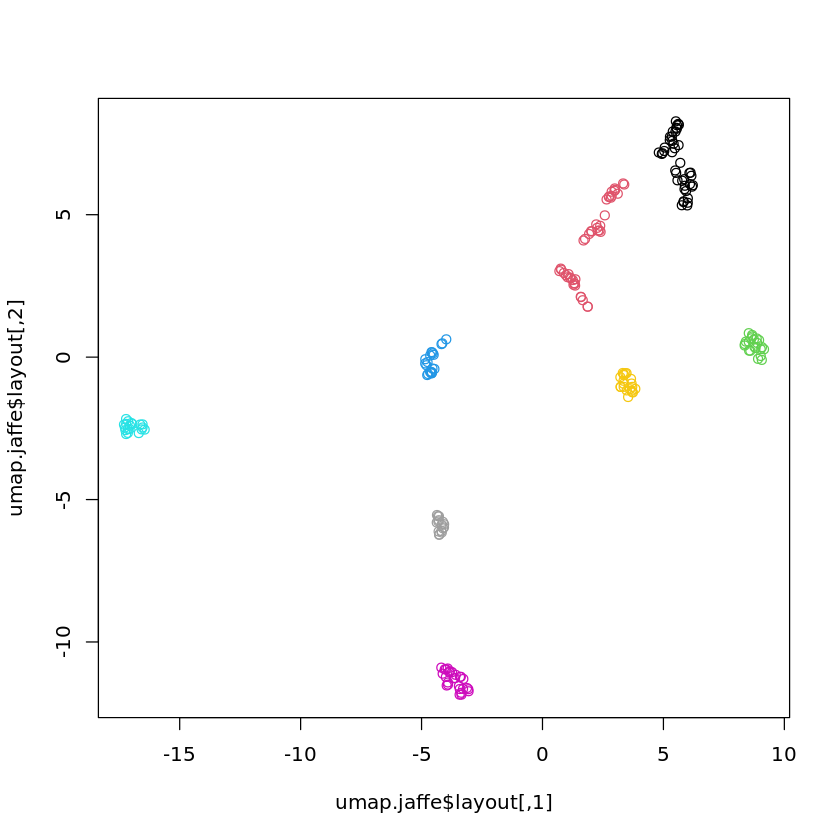

In [ ]:
plot(umap.jaffe$layout,col=mmgMclust.jaffe_umap$classification)

In [ ]:
table(mmgMclust.jaffe_umap$classification,jaffe$y)

   
     1  2  3  4  5  6  7  8  9 10
  1  0  0  0  0 21 21  0  0  0  0
  2 23  0  0  1  0  0 20  0  0  0
  3  0 22  0  0  0  0  0  0  0  0
  4  0  0 22  0  0  0  0  0  0  0
  5  0  0  0 19  0  0  0  0  0  0
  6  0  0  0  0  0  0  0 21  0  6
  7  0  0  0  0  0  0  0  0 21  0
  8  0  0  0  0  0  0  0  0  0 16

In [ ]:
NMI(mmgMclust.jaffe_umap$classification,as.vector(jaffe$y))

[1] 0.8411303

In [ ]:
ARI(mmgMclust.jaffe_umap$classification,as.vector(jaffe$y))

[1] 0.7472366

Utilisation de UMAP permet d'avoir un representations des classes qui sont separable et permet au modeles d'avoir des meilleures performances